<a href="https://colab.research.google.com/github/AbrahamOtero/MLiB/blob/main/4.5_IssuesTrainingNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.1034 - loss: 2.3270 - val_accuracy: 0.0974 - val_loss: 2.3089
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.1059 - loss: 2.3089 - val_accuracy: 0.1028 - val_loss: 2.3045
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.1057 - loss: 2.3054 - val_accuracy: 0.1135 - val_loss: 2.3036
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.1018 - loss: 2.3041 - val_accuracy: 0.1135 - val_loss: 2.3031


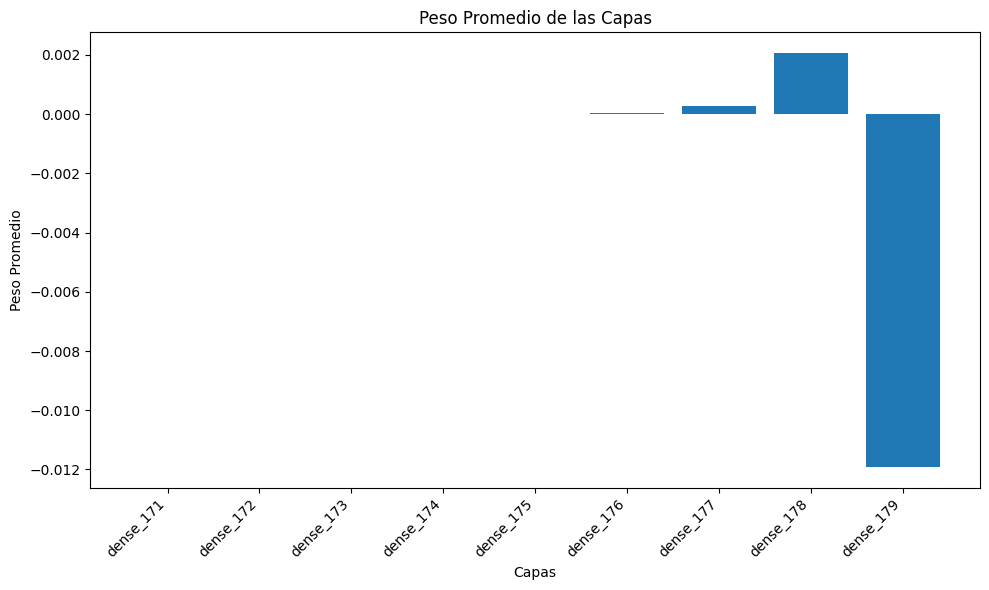

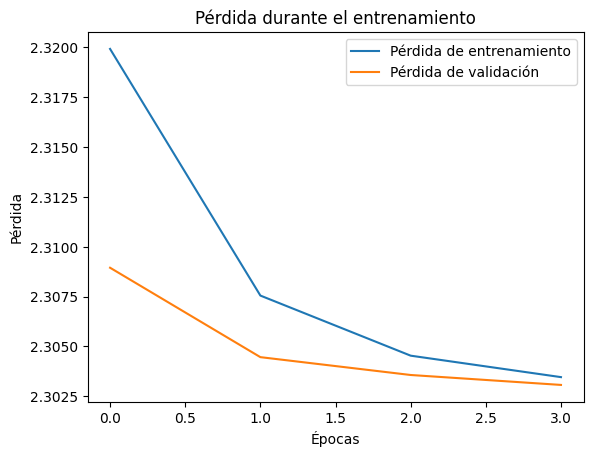

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras import optimizers

# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesar los datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Definir la red neuronal
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Aplanar las imágenes
model.add(Dense(128, activation='sigmoid'))  # Capa oculta con activación sigmoid
model.add(Dense(128, activation='sigmoid'))  # Capa oculta con activación sigmoid
model.add(Dense(128, activation='sigmoid'))  # Capa oculta con activación sigmoid
model.add(Dense(128, activation='sigmoid'))  # Capa oculta con activación sigmoid
model.add(Dense(128, activation='sigmoid'))  # Capa oculta con activación sigmoid
model.add(Dense(128, activation='sigmoid'))  # Capa oculta con activación sigmoid
model.add(Dense(128, activation='sigmoid'))  # Capa oculta con activación sigmoid
model.add(Dense(128, activation='sigmoid'))  # Capa oculta con activación sigmoid
model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilar el modelo
optimizer = optimizers.SGD(learning_rate=0.1)  # Usar un optimizador simple
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

average_weights_ini = []
layer_names = []

for layer in model.layers:
  weights = layer.get_weights()
  if weights:
    for weight_array in weights:
      average_weights_ini.append(np.mean(np.abs(weight_array)))
      layer_names.append(layer.name)
      break

# Entrenar el modelo y guardar la historia
history = model.fit(x_train, y_train, epochs=4, batch_size=32, validation_data=(x_test, y_test))

average_weights = []
layer_names = []

for layer in model.layers:
  weights = layer.get_weights()
  if weights:
    for weight_array in weights:
      average_weights.append(np.mean(np.abs(weight_array)))
      layer_names.append(layer.name)
      break


diff_weights = [w1 - w2 for w1, w2 in zip(average_weights, average_weights_ini)]

plt.figure(figsize=(10, 6))
plt.bar(layer_names, diff_weights)
plt.xlabel("Capas")
plt.ylabel("Peso Promedio")
plt.title("Peso Promedio de las Capas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras import optimizers

# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesar los datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Definir la red neuronal
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Aplanar las imágenes
model.add(Dense(128, activation='relu'))  # Capa oculta con activación relu
model.add(Dense(128, activation='relu'))  # Capa oculta con activación relu
model.add(Dense(128, activation='relu'))  # Capa oculta con activación relu
model.add(Dense(128, activation='relu'))  # Capa oculta con activación relu
model.add(Dense(128, activation='relu'))  # Capa oculta con activación relu
model.add(Dense(128, activation='relu'))  # Capa oculta con activación relu
model.add(Dense(128, activation='relu'))  # Capa oculta con activación relu
model.add(Dense(128, activation='relu'))  # Capa oculta con activación relu
model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilar el modelo
optimizer = optimizers.SGD(learning_rate=0.1)  # Usar un optimizador simple
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

average_weights_ini = []
layer_names = []

for layer in model.layers:
  weights = layer.get_weights()
  if weights:
    for weight_array in weights:
      average_weights_ini.append(np.mean(np.abs(weight_array)))
      layer_names.append(layer.name)
      break

# Entrenar el modelo y guardar la historia
history = model.fit(x_train, y_train, epochs=4, batch_size=32, validation_data=(x_test, y_test))

average_weights = []
layer_names = []

for layer in model.layers:
  weights = layer.get_weights()
  if weights:
    for weight_array in weights:
      average_weights.append(np.mean(np.abs(weight_array)))
      layer_names.append(layer.name)
      break


diff_weights = [w1 - w2 for w1, w2 in zip(average_weights, average_weights_ini)]

plt.figure(figsize=(10, 6))
plt.bar(layer_names, diff_weights)
plt.xlabel("Capas")
plt.ylabel("Peso Promedio")
plt.title("Peso Promedio de las Capas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [ ]:
# prompt: crea una nueva lista que contenga la resta de los elementos de las listas average_weights menos average_weights_ini

diff_weights = [w1 - w2 for w1, w2 in zip(average_weights, average_weights_ini)]


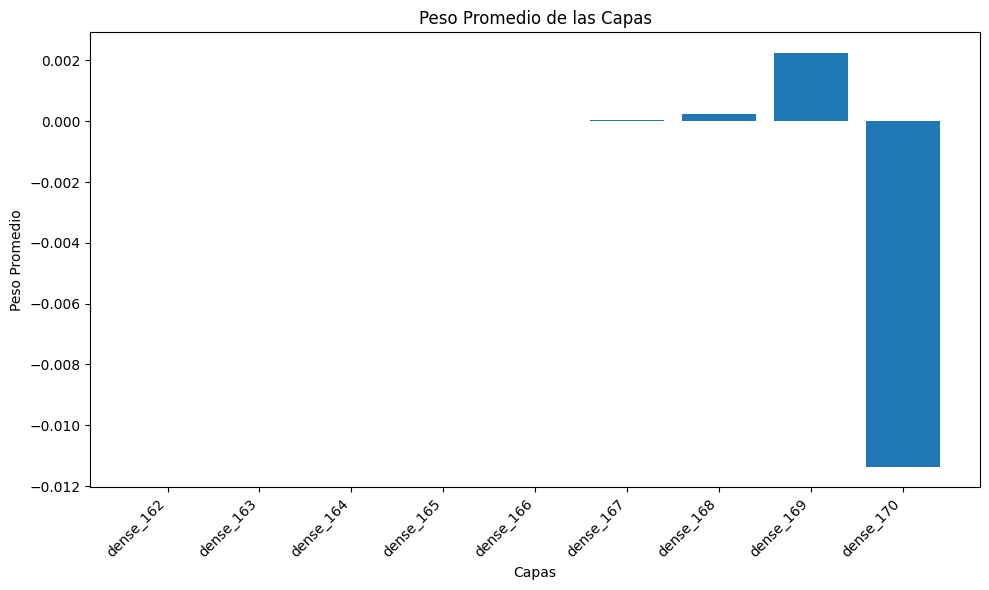

In [39]:
diff_weights = [w1 - w2 for w1, w2 in zip(average_weights, average_weights_ini)]

plt.figure(figsize=(10, 6))
plt.bar(layer_names, diff_weights)
plt.xlabel("Capas")
plt.ylabel("Peso Promedio")
plt.title("Peso Promedio de las Capas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0790 - loss: 1.2613 - val_accuracy: 0.2333 - val_loss: 1.1855
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3866 - loss: 1.1748 - val_accuracy: 0.2667 - val_loss: 1.1443
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2998 - loss: 1.1416 - val_accuracy: 0.3333 - val_loss: 1.1088
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3152 - loss: 1.1045 - val_accuracy: 0.4333 - val_loss: 1.0766
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3858 - loss: 1.0738 - val_accuracy: 0.6333 - val_loss: 1.0465
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4361 - loss: 1.0469 - val_accuracy: 0.7667 - val_loss: 1.0167
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7735 - loss: 1.0169 - val_accuracy: 0.7333 - val_loss: 0.9887
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7528 - loss: 0.9902 - val_accuracy: 0.7000 - val_loss: 0.

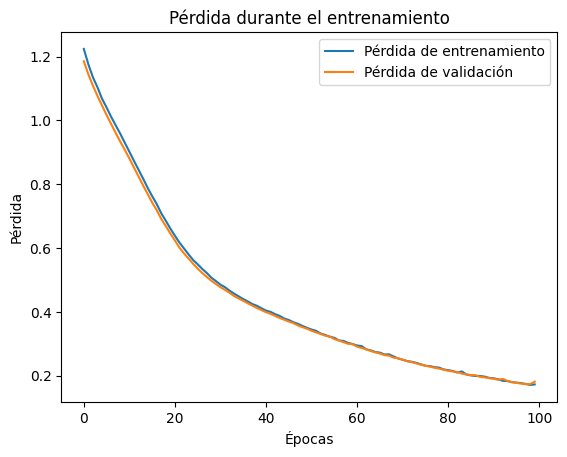

In [25]:
# prompt: Aplica la misma red neuronal que en el ejercicio anterior sobre el conjunto de datos iris

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# Codificar las etiquetas de clase en formato one-hot
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Definir la red neuronal (misma arquitectura que antes)
model = Sequential()
model.add(Dense(128, activation='tanh', input_shape=(4,)))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(3, activation='softmax'))  # 3 neuronas de salida para las 3 clases de Iris

# Compilar el modelo
optimizer = optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Imprimir información de las capas
for layer in model.layers:
    weights = layer.get_weights()
    if weights:
        for weight_array in weights:
            print(f"Capa: {layer.name}, Forma: {weight_array.shape}")
            print(f"Promedio: {np.mean(np.abs(weight_array)):.4f}, Desviación estándar: {np.std(np.abs(weight_array)):.4f}")
            print("-" * 20)

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [14]:
# prompt: escribe código para mostrar el valor promedio y la desviación estándar de los pesos dee cada una de las capassde la red neuronal contenida en model

for layer in model.layers:
  weights = layer.get_weights()
  if weights:
    for weight_array in weights:
      print(f"Capa: {layer.name}, Forma: {weight_array.shape}")
      print(f"Promedio: {np.mean(np.abs(weight_array)):.4f}, Desviación estándar: {np.std(np.abs(weight_array)):.4f}")
      print("-" * 20)

Capa: dense_18, Forma: (784, 128)
Promedio: 0.0406, Desviación estándar: 0.0234
--------------------
Capa: dense_18, Forma: (128,)
Promedio: 0.0000, Desviación estándar: 0.0000
--------------------
Capa: dense_19, Forma: (128, 128)
Promedio: 0.0765, Desviación estándar: 0.0445
--------------------
Capa: dense_19, Forma: (128,)
Promedio: 0.0000, Desviación estándar: 0.0000
--------------------
Capa: dense_20, Forma: (128, 128)
Promedio: 0.0764, Desviación estándar: 0.0441
--------------------
Capa: dense_20, Forma: (128,)
Promedio: 0.0001, Desviación estándar: 0.0001
--------------------
Capa: dense_21, Forma: (128, 128)
Promedio: 0.0762, Desviación estándar: 0.0443
--------------------
Capa: dense_21, Forma: (128,)
Promedio: 0.0003, Desviación estándar: 0.0002
--------------------
Capa: dense_22, Forma: (128, 128)
Promedio: 0.0773, Desviación estándar: 0.0442
--------------------
Capa: dense_22, Forma: (128,)
Promedio: 0.0014, Desviación estándar: 0.0010
--------------------
Capa: dens